# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Berilian Delta Septana
- **Email:** mc011d5y2204@student.devacademy.id
- **ID Dicoding:** mc011d5y2204

## Menentukan Pertanyaan Bisnis

- Bagaimana performa dari sistem Capital Bike Share dalam rental sepeda dari Januari 2011 hingga Desember 2012?
- Pada saat kapan sistem Capital Bike Share melayani sepeda yang disewa dengan jumlah tertinggi?

## Import Semua Packages/Library yang Digunakan

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Data Wrangling

### Gathering Data

In [69]:
# Import dataset yang akan digunakan
day_df = pd.read_csv('Data/day.csv') # menambahkan folder 'Data' terlebih dahulu pada file colab (di dalam 'content')
hour_df = pd.read_csv('Data/hour.csv')

In [70]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset yang digunakan merupakan dataset rental sepeda yang dihitung per jam (hour) dan per hari (day) antara tahun 2011 dan 2012.
- Dataset terdiri dari 17 atribut untuk data 'hour' dan 16 atribut untuk data 'day'. Pembedanya adalah, data 'hour' memasukan atribut 'hr' yang merujuk kepada jam dalam satu hari (0 - 23).

Penjelasan singkat dari masing - masing atribut adalah:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [72]:
# Mengecek info dataset Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [73]:
# Mengecek duplikasi data pada dataset Day
day_df.duplicated().sum()

0

In [74]:
# Describe dari dataset Day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [75]:
# Mengecek info dataset Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [76]:
# Mengecek duplikasi data pada dataset Hour
hour_df.duplicated().sum()

0

In [77]:
# Describe dari dataset Hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada kedua data yang digunakan (Hour dan Day), terdapat kesalahan tipe data pada atribut 'dteday' yang tertulis 'object'. Seharusnya, 'dteday' termasuk dalam tipe data 'datetime' karena bentuk dari atribut tersebut merujuk pada urutan waktu (tahun, bulan, tanggal).
- Selain terkait kesalahan tipe data, kedua data tidak menunjukkan kesalahan lainnya (seperti missing value, duplikasi data, ataupun inaccurate value).

### Cleaning Data

In [78]:
# Mengubah tipe data dteday pada kedua data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [79]:
# Cek ulang menggunakan info() untuk data Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [80]:
# Cek ulang menggunakan info() untuk data Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada tahap data cleaning, tipe data atribut 'dteday' pada kedua dataset diubah yang asalnya 'object' menjadi 'datetime'
- Langkah ini berhasil karena, dengan mengecek ulang info() dari masing-masing dataset, atribut 'dteday' sudah menunjukkan tipe data 'datetime'

## Exploratory Data Analysis (EDA)

### Explore Dataset Day

In [81]:
# Describe dari dataset Day untuk semua atribut
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [82]:
# Melihat jumlah penyewaan sepeda berdasarkan tipe pengguna
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_cnt = day_df['cnt'].sum()

print(f'Jumlah Penyewaan Sepeda Casual: {total_casual}')
print(f'Jumlah Penyewaan Sepeda Registered: {total_registered}')

Jumlah Penyewaan Sepeda Casual: 620017
Jumlah Penyewaan Sepeda Registered: 2672662


In [83]:
# Melihat jumlah penyewaan sepeda setiap bulannya menggunakan groupby()
monthly_df = day_df.resample(rule = 'ME', on = 'dteday').agg({
    'casual': ['min', 'max', 'sum', 'mean'],
    'registered': ['min', 'max', 'sum', 'mean'],
    'cnt': ['min', 'max', 'sum', 'mean']
}).reset_index()

monthly_df['dteday'] = monthly_df['dteday'].dt.to_period('M').astype(str)

print(monthly_df)

     dteday casual                           registered                \
               min   max    sum         mean        min   max     sum   
0   2011-01      9   331   3073    99.129032        416  1844   35116   
1   2011-02     47   694   6242   222.928571        905  2348   41973   
2   2011-03     46  1424  12826   413.741935        491  2355   51219   
3   2011-04    121  1965  22346   744.866667        674  3722   72524   
4   2011-05    255  2355  31050  1001.612903       2213  4238  104771   
5   2011-06    513  1920  30612  1020.400000       2993  4488  112900   
6   2011-07    562  3065  36452  1175.870968       2298  4220  104889   
7   2011-08    226  1914  28842   930.387097        889  4614  107849   
8   2011-09    118  2521  26545   884.833333       1689  4372  100873   
9   2011-10     57  2397  25222   813.612903        570  4267   98289   
10  2011-11     69  1275  15594   519.800000        935  3891   86573   
11  2011-12     50   706   8448   272.516129       

In [84]:
# Melihat waktu dimana terdapat jumlah penyewaan terbesar dan terkecil
timesort_df = day_df.groupby(by = 'dteday')['cnt'].sum().sort_values(ascending=False).reset_index()
print(timesort_df)

        dteday   cnt
0   2012-09-15  8714
1   2012-09-29  8555
2   2012-09-22  8395
3   2012-03-23  8362
4   2012-05-19  8294
..         ...   ...
726 2011-03-06   605
727 2011-01-26   506
728 2012-12-26   441
729 2011-01-27   431
730 2012-10-29    22

[731 rows x 2 columns]


In [85]:
# Melihat rata - rata jumlah sepeda yang disewa berdasarkan hari weekday
weekday_df = day_df.groupby(by = 'weekday')[['casual',
                                'registered',
                                'cnt']].mean().reset_index().assign(weekday = lambda wk : wk['weekday'].map({
                                    0: 'Sunday',
                                    1: 'Monday',
                                    2: 'Tuesday',
                                    3: 'Wednesday',
                                    4: 'Thursday',
                                    5: 'Friday',
                                    6: 'Saturday'
                                }))

print(weekday_df)

     weekday       casual   registered          cnt
0     Sunday  1338.295238  2890.533333  4228.828571
1     Monday   674.133333  3663.990476  4338.123810
2    Tuesday   556.182692  3954.480769  4510.663462
3  Wednesday   551.144231  3997.394231  4548.538462
4   Thursday   590.961538  4076.298077  4667.259615
5     Friday   752.288462  3938.000000  4690.288462
6   Saturday  1465.257143  3085.285714  4550.542857


In [86]:
# Melihat rata - rata jumlah sepeda yang disewa pada tahun 2011 dan 2012
yearmean_df = day_df.groupby(day_df['dteday'].dt.year)['cnt'].mean().reset_index()
yearmean_df['cnt'] = yearmean_df['cnt'].apply(math.ceil)
print(yearmean_df)

   dteday   cnt
0    2011  3406
1    2012  5600


In [87]:
# Melihat peningkatan rata - rata jumlah sepeda yang disewa dari tahun 2011
incyear = (yearmean_df['cnt'].pct_change() * 100).iloc[1]
print(incyear)

64.4157369348209


**Insight:**
- Rata - rata jumlah sepeda yang disewa setiap harinya sebanyak 4504 buah.
- Jumlah sepeda yang disewa setiap bulannya sebesar tidak kurang dari 130000.
- Jumlah sepeda yang disewa terbesar dalam satu hari berada pada tanggal 15 Desember 2012, dan yang terkecil berada pada 29 Oktober 2012.
- Terjadi kenaikan pada rata - rata jumlah pengguna sebesar 64.42% dari tahun 2011 ke tahun 2012.

### Explore Dataset Hour

In [88]:
# Describe dari dataset Hour untuk semua atribut
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [89]:
# Melihat pada jam berapa di waktu kapan terjadi rental sepeda terbesar dan terkecil
hoursort_df = hour_df.groupby(['dteday', 'hr'])['cnt'].sum().sort_values(ascending=False).reset_index()
print(hoursort_df)

          dteday  hr  cnt
0     2012-09-12  18  977
1     2012-09-20  17  976
2     2012-09-11  17  970
3     2012-09-10  18  968
4     2012-09-25  17  967
...          ...  ..  ...
17374 2012-04-21   5    1
17375 2011-01-20   4    1
17376 2011-01-20   3    1
17377 2011-02-16   3    1
17378 2011-09-18   4    1

[17379 rows x 3 columns]


In [90]:
# Melihat rata-rata rental sepeda berdasarkan pembagian waktu
timecat_df = hour_df.groupby([
    hour_df['hr'].apply(lambda j: 'Pagi Buta' if j <= 5 else 'Pagi' if j <= 10 else 'Siang' if j <= 15 else 'Sore' if j <= 19 else 'Malam')
])[['casual','registered','cnt']].mean().reset_index()

print(timecat_df)

          hr     casual  registered         cnt
0      Malam  25.485234  128.892514  154.377747
1       Pagi  22.863198  185.229012  208.092210
2  Pagi Buta   4.507717   20.400842   24.908559
3      Siang  70.129599  171.345964  241.475563
4       Sore  64.490741  313.139232  377.629973


In [91]:
# Melihat jam dengan rata - rata rental sepeda terbesar dan terkecil pada saat Holiday
hourmean_df = hour_df[hour_df['holiday'] == 1].groupby('hr')['cnt'].mean().sort_values(ascending=False).reset_index()
print(hourmean_df)

    hr         cnt
0   13  298.523810
1   17  293.142857
2   12  287.142857
3   14  286.285714
4   16  272.285714
5   18  268.761905
6   15  265.142857
7   11  248.523810
8   19  221.761905
9   10  203.476190
10  20  177.952381
11   9  171.190476
12   8  170.523810
13  21  145.095238
14  22  108.857143
15   7   82.142857
16  23   57.904762
17   0   57.476190
18   1   38.904762
19   6   28.285714
20   2   25.476190
21   3   11.611111
22   5   10.619048
23   4    5.850000


**Insight:**
- Rata - rata jumlah sepeda yang disewa setiap jamnya sekitar 189 buah.
- Para pengguna cenderung merental sepeda mereka pada waktu sore dan siang hari.
- Pada saat hari libur (holiday), jam tersibuk Capital Bike Share dalam melayani sepeda yang disewa adalah di jam 1 siang.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa dari sistem Capital Bike Share dalam rental sepeda dari Januari 2011 hingga Desember 2012?

In [92]:
# Mengurutkan data jumlah sepeda yang disewa berdasarkan hari
daily_df = day_df.resample(rule = 'D', on = 'dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

daily_df['dteday'] = daily_df['dteday'].dt.to_period('D').astype(str)

print(daily_df)

         dteday  casual  registered   cnt
0    2011-01-01     331         654   985
1    2011-01-02     131         670   801
2    2011-01-03     120        1229  1349
3    2011-01-04     108        1454  1562
4    2011-01-05      82        1518  1600
..          ...     ...         ...   ...
726  2012-12-27     247        1867  2114
727  2012-12-28     644        2451  3095
728  2012-12-29     159        1182  1341
729  2012-12-30     364        1432  1796
730  2012-12-31     439        2290  2729

[731 rows x 4 columns]


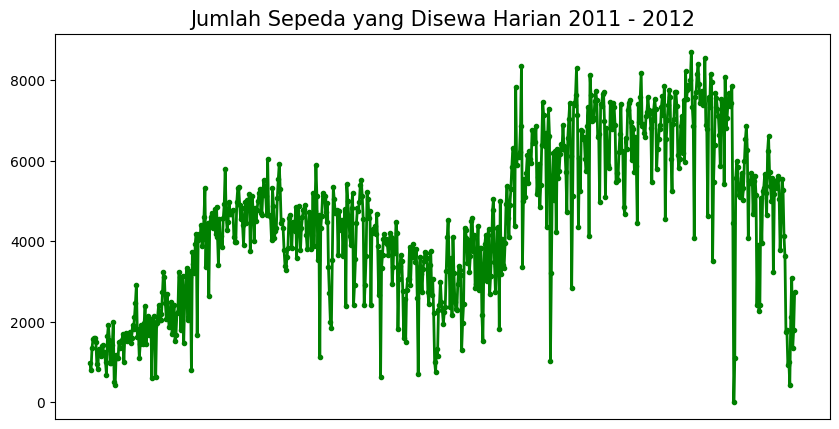

In [93]:
# Membuat Linechart berdasarkan dataset daily
plt.figure(figsize=(10, 5))
plt.plot(daily_df['cnt'], marker='.', linewidth=2, color="Green")
plt.title("Jumlah Sepeda yang Disewa Harian 2011 - 2012", loc="center", fontsize=15)
plt.xticks([])
plt.yticks(fontsize=10)
plt.show()

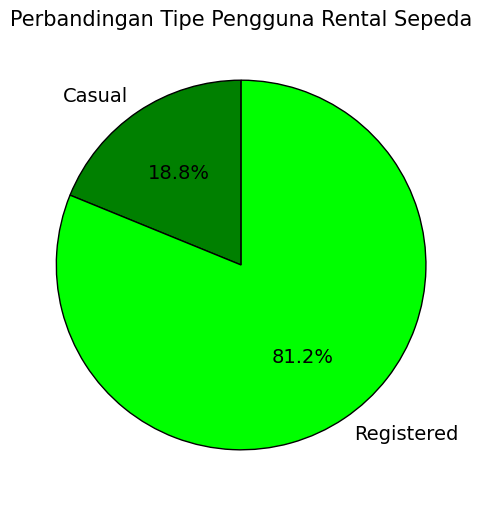

In [94]:
# Membuat piechart perbandingan jumlah sepeda yang disewa berdasarkan tipe
comptype_df = pd.DataFrame({
    'Type': ['Casual', 'Registered'],
    'Total': [day_df['casual'].sum(), day_df['registered'].sum()]
})

plt.figure(figsize=(6, 6))
colors = ["Green", "Lime"]

plt.pie(comptype_df['Total'], labels=comptype_df['Type'],
        autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        textprops={'fontsize': 14})
plt.title("Perbandingan Tipe Pengguna Rental Sepeda", loc="center", fontsize=15)
plt.show()

**Insight:**
- Jumlah sepeda yang disewa pada sistem Bike Central Share mengalami fluktuatif, yakni meningkat pada semester pertama dan menurun di semester kedua, lalu meningkat lagi pada semester pertama di tahun berikutnya dan menurun lagi di semester berikutnya.
- Pengguna rental sepeda terdaftar (registered) memiliki jumlah yang lebih banyak dibandingkan pengguna rental sepeda casual, dengan total dari pengguna terdaftar mencapai 81.2% dari keseluruhan total pengguna.

### Pertanyaan 2: Pada saat kapan sistem Capital Bike Share melayani sepeda yang disewa dengan jumlah tertinggi?

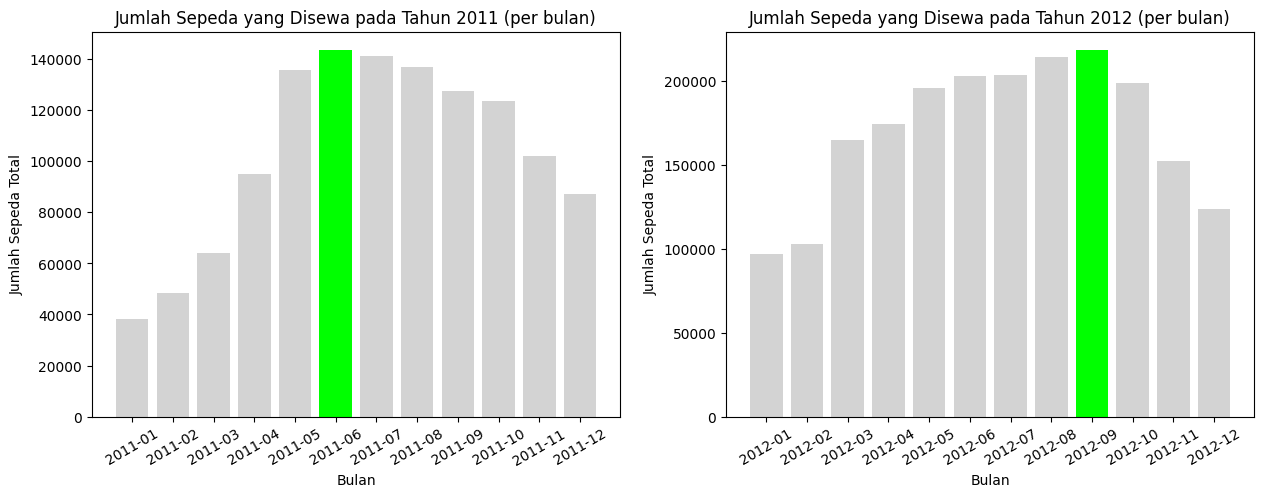

In [95]:
# Bar chart untuk jumlah sepeda yang disewa pada tahun 2011 dan 2012 per bulan
monthly2011_df = monthly_df[monthly_df['dteday'].str.startswith('2011')]
monthly2012_df = monthly_df[monthly_df['dteday'].str.startswith('2012')]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colors_2011 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "Lime",
               "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_2012 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
               "#D3D3D3", "#D3D3D3", "Lime", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Bar chart jumlah sepeda sewa tahun 2011
ax[0].bar(monthly2011_df['dteday'], monthly2011_df['cnt']['sum'], color=colors_2011)
ax[0].set_title("Jumlah Sepeda yang Disewa pada Tahun 2011 (per bulan)", loc="center", fontsize=12)
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel("Bulan")
ax[0].set_ylabel("Jumlah Sepeda Total")
ax[0].tick_params(axis='x', rotation=30)

# Bar chart jumlah sepeda sewa tahun 2012
ax[1].bar(monthly2012_df['dteday'], monthly2012_df['cnt']['sum'], color=colors_2012)
ax[1].set_title("Jumlah Sepeda yang Disewa pada Tahun 2012 (per bulan)", loc="center", fontsize=12)
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel("Bulan")
ax[1].set_ylabel("Jumlah Sepeda Total")
ax[1].tick_params(axis='x', rotation=30)

plt.show()

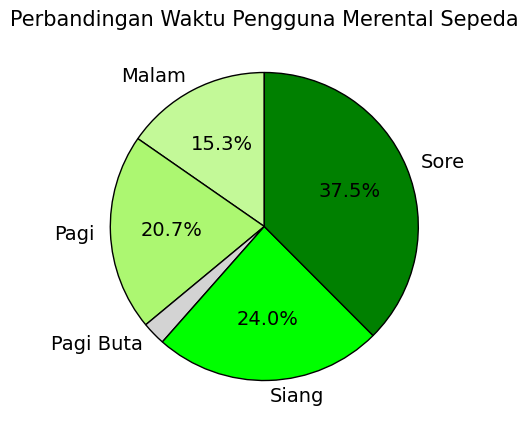

In [96]:
# Piechart untuk penbagian waktu pengguna merental sepeda
plt.figure(figsize=(8, 5))
colors_timecat = ["#C3F998", "#ACF771", "#D3D3D3", "Lime", "Green"]

plt.pie(timecat_df['cnt'], labels=timecat_df['hr'],
        autopct=lambda pt: f'{pt:.1f}%' if pt > 3 else '', startangle=90,
        colors=colors_timecat, wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        textprops={'fontsize': 14})
plt.title("Perbandingan Waktu Pengguna Merental Sepeda", loc="center", fontsize=15)
plt.show()

**Insight:**
- Sistem Bike Central Share melayani sepeda yang disewa dengan jumlah tertinggi pada bulan September di tahun 2012, serta pada Juni di tahun 2011.
- Berdasarkan pembagian waktu, banyak pengguna merental sepeda pada saat sore hari, disusul siang dan pagi hari.

## Analisis Lanjutan: Klastering Jumlah Sepeda yang Disewa pada Kondisi Tertentu

### Jumlah Sepeda Sewa Berdasarkan Tingkat Kelembaman (Humidity) dan Kecepatan Angin (windspeed)

In [97]:
# Melihat jumlah sepeda yang disewa berdasarkan tingkat humidity
hum_df = day_df.groupby([
    day_df['hum'].apply(lambda h: 'Low' if h <= 0.3 else 'Moderate' if h <= 0.6 else 'High')
])[['casual','registered','cnt']].sum().reset_index()

print(tabulate((hum_df), headers='keys', tablefmt='grid'))

+----+----------+----------+--------------+---------+
|    | hum      |   casual |   registered |     cnt |
+====+==========+==========+==============+=========+
|  0 | High     |   341914 |      1480237 | 1822151 |
+----+----------+----------+--------------+---------+
|  1 | Low      |     6591 |        12795 |   19386 |
+----+----------+----------+--------------+---------+
|  2 | Moderate |   271512 |      1179630 | 1451142 |
+----+----------+----------+--------------+---------+


In [98]:
# Melihat jumlah sepeda yang disewa berdasarkan kecepatan angin menggunakan groupby()
wind_df = day_df.groupby([
    day_df['windspeed'].apply(lambda w: 'Low' if w <= 0.2 else 'Moderate' if w <= 0.4 else 'High')
])[['casual','registered','cnt']].sum().reset_index()

print(tabulate((wind_df), headers='keys', tablefmt='grid'))

+----+-------------+----------+--------------+---------+
|    | windspeed   |   casual |   registered |     cnt |
+====+=============+==========+==============+=========+
|  0 | High        |     2848 |        24232 |   27080 |
+----+-------------+----------+--------------+---------+
|  1 | Low         |   397982 |      1708049 | 2106031 |
+----+-------------+----------+--------------+---------+
|  2 | Moderate    |   219187 |       940381 | 1159568 |
+----+-------------+----------+--------------+---------+


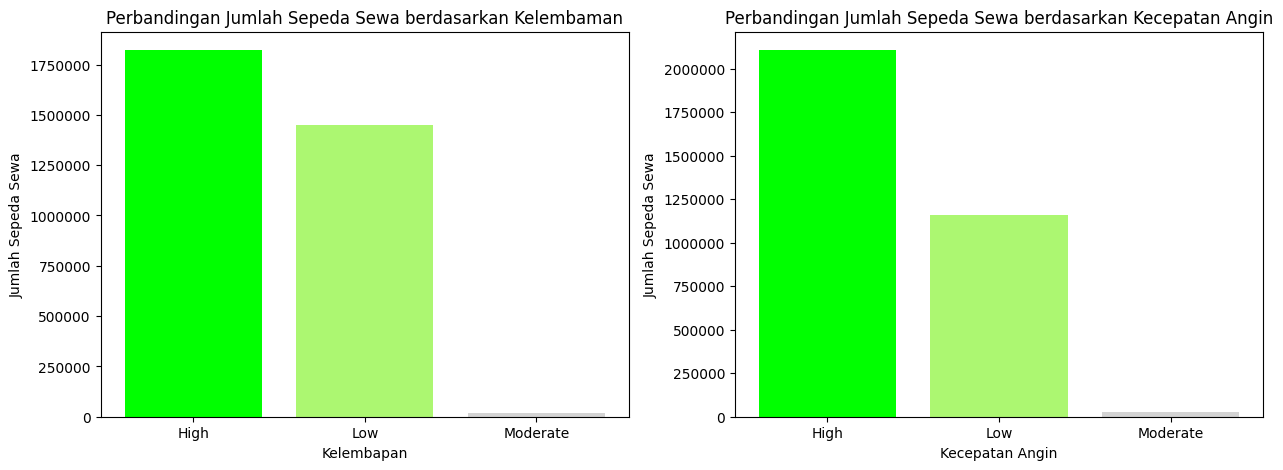

In [99]:
# Membuat Bar chart jumlah sepeda yang disewa berdasarkan humidity dan windspeed
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
col_hum = ["Lime", "#ACF771", "#D3D3D3"]
col_wind = ["Lime", "#ACF771", "#D3D3D3"]

# Bar chart jumlah sepeda yang disewa berdasarkan humidity

ax[0].bar(hum_df["hum"], hum_df["cnt"].sort_values(ascending = False), color=col_hum)
ax[0].set_title("Perbandingan Jumlah Sepeda Sewa berdasarkan Kelembaman", loc="center", fontsize=12)
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel("Kelembapan")
ax[0].set_ylabel("Jumlah Sepeda Sewa")

# Bar chart jumlah sepeda yang disewa berdasarkan windspeed

ax[1].bar(wind_df["windspeed"], wind_df["cnt"].sort_values(ascending = False), color=col_wind)
ax[1].set_title("Perbandingan Jumlah Sepeda Sewa berdasarkan Kecepatan Angin", loc="center", fontsize=12)
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel("Kecepatan Angin")
ax[1].set_ylabel("Jumlah Sepeda Sewa")

plt.show()

In [100]:
# Klastering menurut Humidity dan Windspeed
hum_wind_df = day_df.groupby([
    day_df['hum'].apply(lambda h: 'Low' if h <= 0.3 else 'Moderate' if h <= 0.6 else 'High'),
    day_df['windspeed'].apply(lambda w: 'Low' if w <= 0.2 else 'Moderate' if w <= 0.4 else 'High')
])['cnt'].sum().reset_index().rename(columns = {
    'hum': 'Kelembapan',
    'windspeed': 'Kecepatan Angin',
    'cnt': 'Total Sepeda Sewa'
})

print(tabulate((hum_wind_df), headers='keys', tablefmt='grid'))

+----+--------------+-------------------+---------------------+
|    | Kelembapan   | Kecepatan Angin   |   Total Sepeda Sewa |
+====+==============+===================+=====================+
|  0 | High         | High              |                4195 |
+----+--------------+-------------------+---------------------+
|  1 | High         | Low               |             1296360 |
+----+--------------+-------------------+---------------------+
|  2 | High         | Moderate          |              521596 |
+----+--------------+-------------------+---------------------+
|  3 | Low          | High              |                1635 |
+----+--------------+-------------------+---------------------+
|  4 | Low          | Low               |                5102 |
+----+--------------+-------------------+---------------------+
|  5 | Low          | Moderate          |               12649 |
+----+--------------+-------------------+---------------------+
|  6 | Moderate     | High              

### Jumlah Sepeda Sewa Berdasarkan Suhu (Aktual dan Terasa)

In [101]:
# Melihat Proporsi jumlah sepeda yang disewa pada Berbagai Tingkat Suhu Aktual
temp_df = day_df.groupby([
    day_df['temp'].apply(lambda t: 'Very Cold' if t <= 0.3 else 'Cold' if t <= 0.5 else 'Warm' if t <= 0.7 else 'Hot')
])[['casual','registered','cnt']].sum().reset_index()

print(tabulate((temp_df), headers='keys', tablefmt='grid'))

+----+-----------+----------+--------------+---------+
|    | temp      |   casual |   registered |     cnt |
+====+===========+==========+==============+=========+
|  0 | Cold      |   154915 |       773491 |  928406 |
+----+-----------+----------+--------------+---------+
|  1 | Hot       |   156535 |       574077 |  730612 |
+----+-----------+----------+--------------+---------+
|  2 | Very Cold |    31080 |       290384 |  321464 |
+----+-----------+----------+--------------+---------+
|  3 | Warm      |   277487 |      1034710 | 1312197 |
+----+-----------+----------+--------------+---------+


In [102]:
# Melihat Proporsi jumlah sepeda yang disewa pada Berbagai Tingkat Suhu Terasa
atemp_df = day_df.groupby([
    day_df['atemp'].apply(lambda at: 'Cold' if at <= 0.3 else 'Good' if at <= 0.6 else 'hot')
])[['casual','registered','cnt']].sum().reset_index()

print(tabulate((atemp_df), headers='keys', tablefmt='grid'))

+----+---------+----------+--------------+---------+
|    | atemp   |   casual |   registered |     cnt |
+====+=========+==========+==============+=========+
|  0 | Cold    |    30468 |       280602 |  311070 |
+----+---------+----------+--------------+---------+
|  1 | Good    |   343766 |      1526900 | 1870666 |
+----+---------+----------+--------------+---------+
|  2 | hot     |   245783 |       865160 | 1110943 |
+----+---------+----------+--------------+---------+


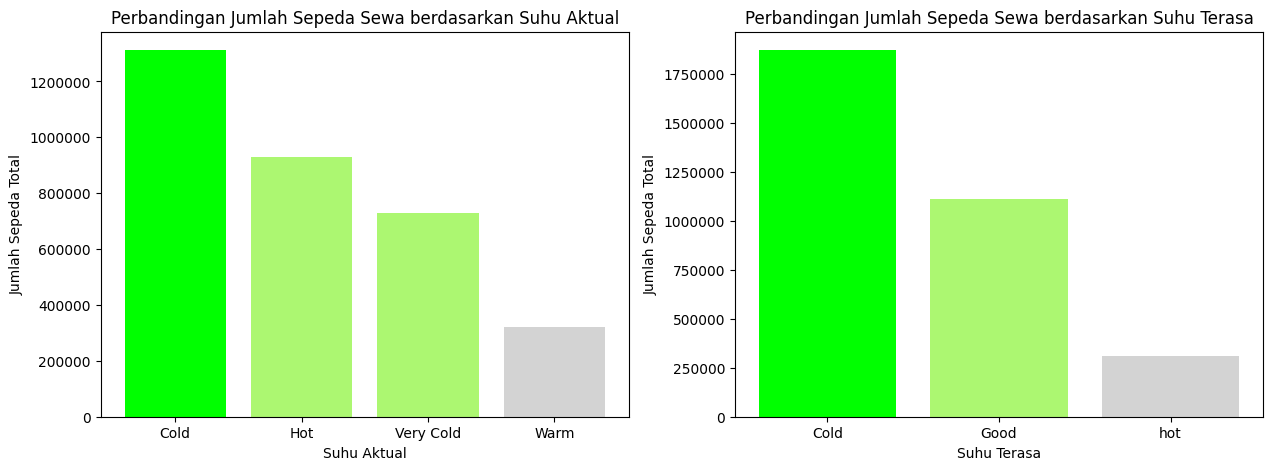

In [103]:
# Membuat bar chart Proporsi jumlah sepeda yang disewa pada Berbagai Tingkat Suhu

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
col_temp = ["Lime", "#ACF771" ,"#ACF771", "#D3D3D3"]
col_atemp = ["Lime", "#ACF771", "#D3D3D3"]

# Bar chart jumlah sepeda sewa berdasarkan suhu aktual
ax[0].bar(temp_df["temp"], temp_df["cnt"].sort_values(ascending = False), color=col_temp)
ax[0].set_title("Perbandingan Jumlah Sepeda Sewa berdasarkan Suhu Aktual", loc="center", fontsize=12)
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel("Suhu Aktual")
ax[0].set_ylabel("Jumlah Sepeda Total")

# Bar chart jumlah sepeda sewa berdasarkan suhu terasa
ax[1].bar(atemp_df["atemp"], atemp_df["cnt"].sort_values(ascending = False), color=col_atemp)
ax[1].set_title("Perbandingan Jumlah Sepeda Sewa berdasarkan Suhu Terasa", loc="center", fontsize=12)
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel("Suhu Terasa")
ax[1].set_ylabel("Jumlah Sepeda Total")


plt.show()

In [104]:
# Klastering menurut Suhu Aktual dan Suhu Terasa
temp_atemp_df = day_df.groupby([
    day_df['temp'].apply(lambda t: 'Very Cold' if t <= 0.3 else 'Cold' if t <= 0.5 else 'Warm' if t <= 0.7 else 'Hot'),
    day_df['atemp'].apply(lambda at: 'Cold' if at <= 0.3 else 'Good' if at <= 0.6 else 'hot')
])['cnt'].sum().reset_index().rename(columns = {
    'temp': 'Suhu Aktual',
    'atemp': 'Suhu Terasa',
    'cnt': 'Total Sepeda Sewa'
})

print(tabulate((temp_atemp_df), headers='keys', tablefmt='grid'))

+----+---------------+---------------+---------------------+
|    | Suhu Aktual   | Suhu Terasa   |   Total Sepeda Sewa |
+====+===============+===============+=====================+
|  0 | Cold          | Cold          |                7919 |
+----+---------------+---------------+---------------------+
|  1 | Cold          | Good          |              920487 |
+----+---------------+---------------+---------------------+
|  2 | Hot           | Cold          |                7148 |
+----+---------------+---------------+---------------------+
|  3 | Hot           | hot           |              723464 |
+----+---------------+---------------+---------------------+
|  4 | Very Cold     | Cold          |              296003 |
+----+---------------+---------------+---------------------+
|  5 | Very Cold     | Good          |               25461 |
+----+---------------+---------------+---------------------+
|  6 | Warm          | Good          |              924718 |
+----+---------------+--

### Jumlah Sepeda Sewa Berdasarkan Kondisi Cuaca

In [105]:
# Membuat Dataframe Jumlah Pengguna Merental Sepeda Berdasarkan Cuaca
weather_df = (day_df.groupby('weathersit')[['casual',
                                            'registered','cnt']].sum().reset_index().assign(weathersit = lambda w: w['weathersit'].map({
                                  1: 'Clear/cloudy',
                                  2: 'Mist',
                                  3: 'Light snow/rain'
                              })).rename(columns = {
                                  'weathersit': 'Cuaca',
                                  'casual': 'Jumlah Pengguna Casual',
                                  'registered': 'Jumlah Pengguna Registered',
                                  'cnt': 'Jumlah Sepeda Total'})).sort_values(by = ['Jumlah Sepeda Total'], ascending=False)

print(tabulate((weather_df), headers='keys', tablefmt='grid'))

+----+-----------------+--------------------------+------------------------------+-----------------------+
|    | Cuaca           |   Jumlah Pengguna Casual |   Jumlah Pengguna Registered |   Jumlah Sepeda Total |
+====+=================+==========================+==============================+=======================+
|  0 | Clear/cloudy    |                   446346 |                      1811606 |               2257952 |
+----+-----------------+--------------------------+------------------------------+-----------------------+
|  1 | Mist            |                   169776 |                       827082 |                996858 |
+----+-----------------+--------------------------+------------------------------+-----------------------+
|  2 | Light snow/rain |                     3895 |                        33974 |                 37869 |
+----+-----------------+--------------------------+------------------------------+-----------------------+


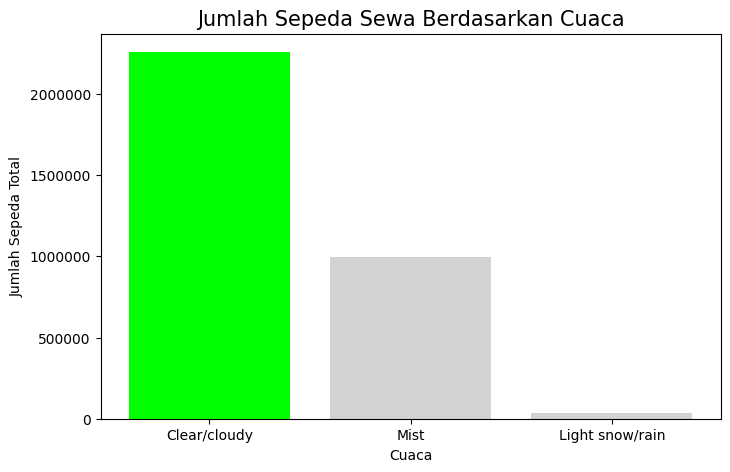

In [106]:
# Membuat Baplot Jumlah Pengguna Rental Sepeda Berdasarkan Cuaca
plt.figure(figsize=(8, 5))
colors_weather = ["Lime", "#D3D3D3", "#D3D3D3"]

plt.bar(weather_df["Cuaca"], weather_df["Jumlah Sepeda Total"], color=colors_weather)
plt.title("Jumlah Sepeda Sewa Berdasarkan Cuaca", fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Sepeda Total")
plt.show()

**Insight:**
- Klastering dengan manual grouping dilakukan untuk melihat distribusi jumlah sepeda yang disewa pada saat kondisitertentu.
- Berdasarkan tingkat humidity/kelembaman dan kecepatan angin, banyak sepeda yang disewa pada saat tingkat kelembamannya tinggi dengan kecepatan angin rendah.
- Berdasarkan suhu aktual dan suhu terasa, banyak pengguna merental dan menggunakan sepeda rental mereka pada saat suhu udara (aktual), dengan kategori suhu terasa pada tubuh yang aman.
- Suhu Terasa (Apparent Temperature) mengacu pada bagaimana manusia merasakan suhu udara, dimana hal ini dipengaruhi oleh faktor - faktor seperti kelembapan dan kecepatan angin.
- Berdasarkan kondisi cuaca, banyak sepeda yang disewa pada saat cuacanya cerah dan berawan, diikuti cuaca berkabut. Sangat sedikit jumlah sepeda yang disewa pada saat cuacanya hujan  / hujan salju ringan.

## Conclusion

- Selama 24 bulan (Januari 2011 - Desember 2012), jumlah sepeda yang disewa pada sistem Capital Bike Share mengalami fluktuatif, yakni meningkat saat semester 1 atau awal tahun dan menurun di semester 2 atau akhir tahun. Selain itu, pengguna rental sepeda pada sistem Capital Bike Share lebih banyak yang sudah menjadi pengguna terdaftar (registered) dibandingkan pengguna casual.
- Sistem Capital Bike Share melayani jumlah sepeda yang disewa dengan jumlah tertinggi pada bulan September di tahun 2012, serta pada Juni di tahun 2011, dimana para pengguna yang merental sepeda cenderung menyewa/merental sepeda mereka pada saat sore hari. Saat hari libur, sistem Capital Bike Share melayani pengguna rental sepeda tertinggi pada jam 1 siang.
- Banyak sepeda yang disewa pada saat tingkat kelembaman menunjukkan kategori high dan saat tingkat kecepatan udara rendah. Selain itu, para pengguna merental dan menggunakan sepeda sewa mereka saat suhu udaranya hangat dan bagus untuk tubuh mereka. Para pengguna juga kebanyakan menyewa sepedanya untuk digunakan/dikendarai pada saat cuaca cerah.